### CRoss Industry Standard Process for Data Mining (CRISP - DM) Method
- Barry - Bussiness Understanding - What does the business need?
- Drove - Data Understanding - What data do we have / need? Is it clean?
- Directly to the - Data Preparation - How do we organize the data for modeling?
- Medical - Modeling - What modeling techniques should we apply?
- Emergency - Evaluation - Which model best meets the business objectives?
- Department - Deployment - How do stakeholders access the results?

# Business Understanding
- Engagement level classification
- Face landmarks and head pose features data extracted from Mediapipe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('engagement.csv')
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,VeryEngaged,0.428021,0.566331,-0.846965,0.999854,0.453438,0.511587,-0.806450,0.999585,0.467169,...,-0.008006,0.0,0.473038,0.512698,0.005128,0.0,0.477068,0.508792,0.005216,0.0
1,VeryEngaged,0.417632,0.568355,-0.841822,0.999859,0.445398,0.517177,-0.803710,0.999598,0.460983,...,-0.007594,0.0,0.469454,0.516445,0.005259,0.0,0.473790,0.512148,0.005346,0.0
2,VeryEngaged,0.413305,0.570787,-0.843086,0.999862,0.442470,0.521228,-0.805503,0.999604,0.458644,...,-0.008409,0.0,0.466941,0.518524,0.004070,0.0,0.471252,0.514148,0.004137,0.0
3,VeryEngaged,0.409942,0.572866,-0.845846,0.999862,0.439856,0.524547,-0.808569,0.999602,0.456351,...,-0.008666,0.0,0.465836,0.519998,0.003755,0.0,0.470114,0.515615,0.003821,0.0
4,VeryEngaged,0.410820,0.574290,-0.832475,0.999867,0.440256,0.526780,-0.793832,0.999615,0.456453,...,-0.008948,0.0,0.465961,0.520987,0.003949,0.0,0.470109,0.516579,0.004043,0.0


In [3]:
# See the info if here is a missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Columns: 2005 entries, class to v501
dtypes: float64(2004), object(1)
memory usage: 20.6+ MB


In [4]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

class 3 ['VeryEngaged' 'NormalEngaged' 'NotEngaged']
x1 1344 [0.42802113 0.41763154 0.41330475 ... 0.56243467 0.56555587 0.57086694]
y1 1346 [0.56633115 0.5683552  0.5707866  ... 0.56693184 0.56694895 0.56705213]
z1 1347 [-0.84696519 -0.84182233 -0.84308594 ... -0.39219716 -0.34906074
 -0.33193865]
v1 1124 [0.99985385 0.99985927 0.99986213 ... 0.99114752 0.98986375 0.98906749]
x2 1347 [0.45343757 0.44539768 0.44247031 ... 0.55611819 0.55842388 0.56305486]
y2 1346 [0.51158714 0.51717728 0.52122837 ... 0.53344053 0.53385919 0.53421485]
z2 1347 [-0.80645007 -0.80370986 -0.80550271 ... -0.36704597 -0.32546362
 -0.30789757]
v2 1235 [0.99958521 0.99959779 0.99960363 ... 0.98535126 0.98333311 0.98204774]
x3 1346 [0.46716928 0.46098319 0.45864424 ... 0.5560047  0.55765033 0.56152308]
y3 1345 [0.51226121 0.51708627 0.52112496 ... 0.53146589 0.53193301 0.53229898]
z3 1347 [-0.80686998 -0.80408704 -0.80586064 ... -0.36734855 -0.3257722
 -0.30819905]
v3 1251 [0.99954307 0.99955785 0.99956524 ... 0

In [5]:
df.describe()

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,...,1347.000000,1347.0,1347.000000,1347.000000,1347.000000,1347.0,1347.000000,1347.000000,1347.000000,1347.0
mean,0.434986,0.564798,-0.647882,0.999748,0.454581,0.524114,-0.608237,0.999492,0.467140,0.524258,...,-0.004885,0.0,0.474691,0.520568,0.005082,0.0,0.477955,0.516763,0.005219,0.0
std,0.038354,0.023468,0.161298,0.000626,0.035173,0.018873,0.158794,0.001097,0.034229,0.018508,...,0.004148,0.0,0.034460,0.018879,0.008572,0.0,0.034643,0.018890,0.009140,0.0
min,0.384482,0.510267,-0.994860,0.989067,0.399350,0.480764,-0.991546,0.982048,0.407919,0.480857,...,-0.014747,0.0,0.411686,0.484405,-0.025388,0.0,0.414095,0.482455,-0.027115,0.0
25%,0.405178,0.546540,-0.748273,0.999743,0.431973,0.511442,-0.697579,0.999522,0.448933,0.510485,...,-0.008072,0.0,0.461020,0.504797,0.002755,0.0,0.465306,0.501106,0.002720,0.0
50%,0.423618,0.569444,-0.614166,0.999876,0.448906,0.525918,-0.573140,0.999699,0.463411,0.525551,...,-0.004987,0.0,0.472430,0.521655,0.005297,0.0,0.476375,0.518021,0.005408,0.0
75%,0.453704,0.583584,-0.538459,0.999914,0.472716,0.535980,-0.510572,0.999845,0.484784,0.536477,...,-0.002793,0.0,0.491962,0.529951,0.008291,0.0,0.494941,0.525608,0.008706,0.0
max,0.570867,0.610245,-0.188137,0.999981,0.563055,0.575149,-0.144212,0.999936,0.561523,0.575042,...,0.009933,0.0,0.592314,0.583909,0.030946,0.0,0.594921,0.580516,0.032646,0.0


In [8]:
df.dtypes

class     object
x1       float64
y1       float64
z1       float64
v1       float64
          ...   
v500     float64
x501     float64
y501     float64
z501     float64
v501     float64
Length: 2005, dtype: object

### Visualize Data

In [9]:
from matplotlib import pyplot as plt 
import seaborn as sns

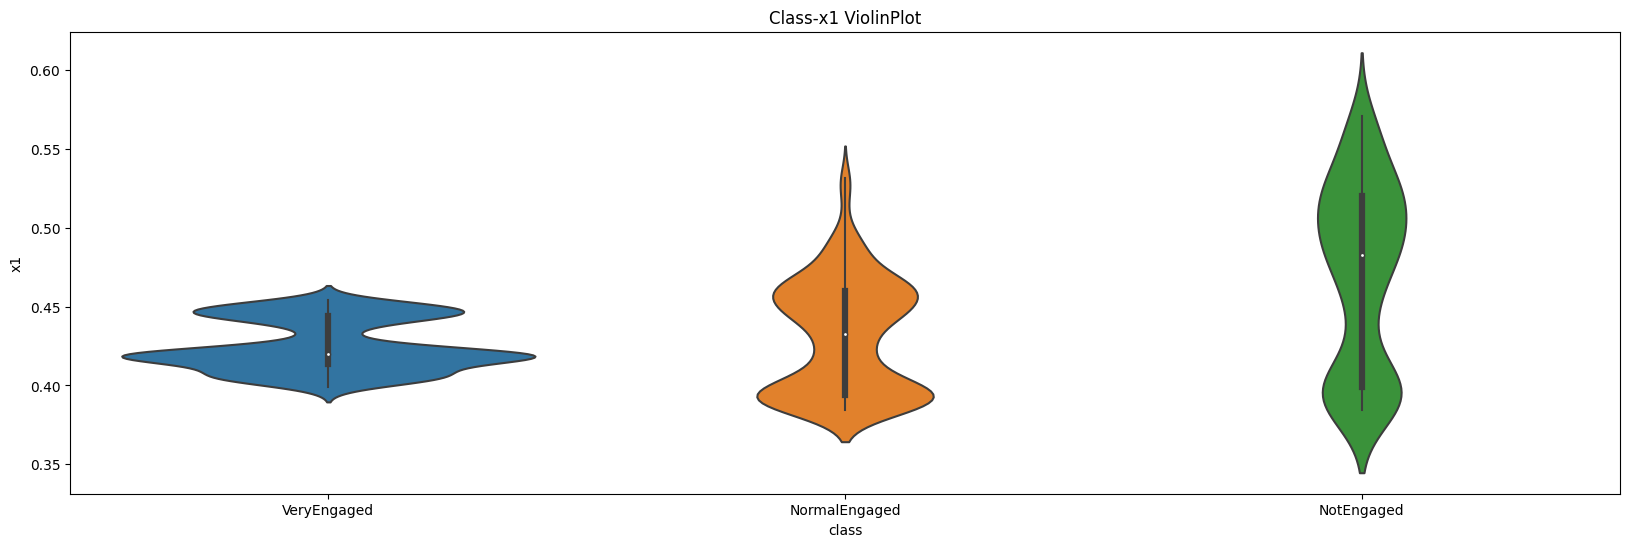

In [21]:
plt.figure(figsize=(20,6))
sns.violinplot(x="class", y='x1', data=df).set_title('Class-x1 ViolinPlot')
plt.show()

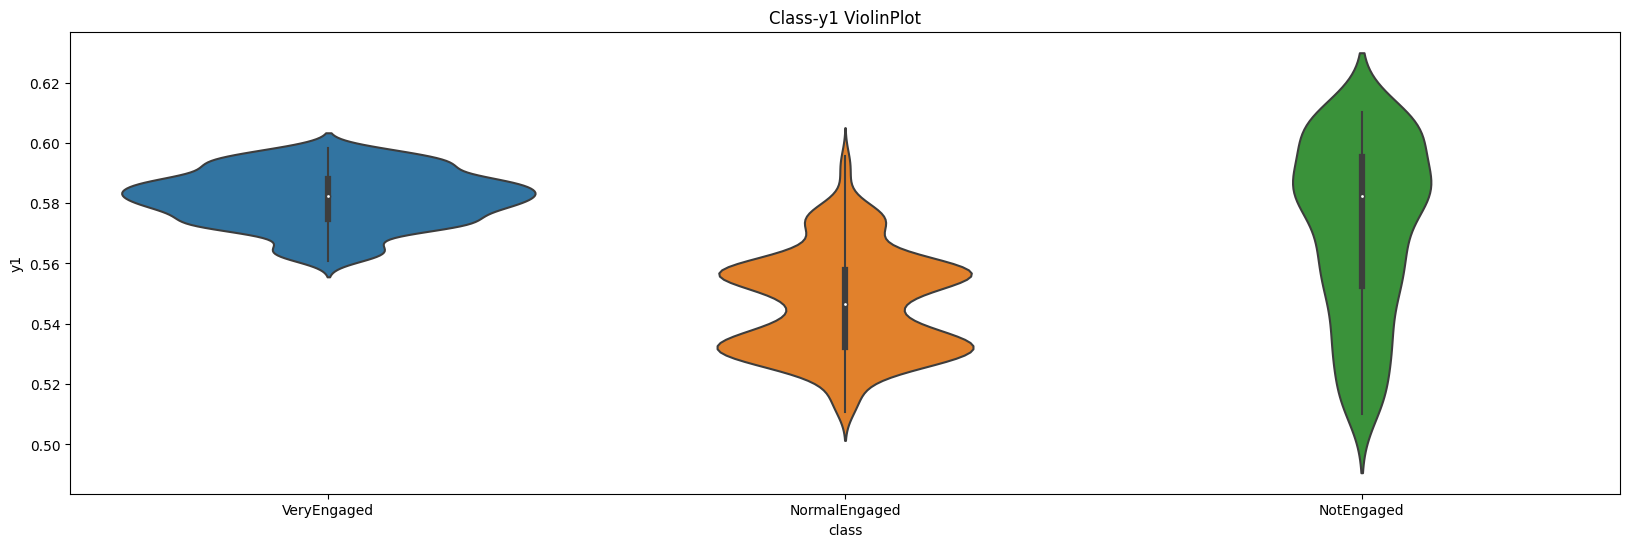

In [17]:
plt.figure(figsize=(20,6))
sns.violinplot(x="class", y='y1', data=df).set_title('Class-y1 ViolinPlot')
plt.show()

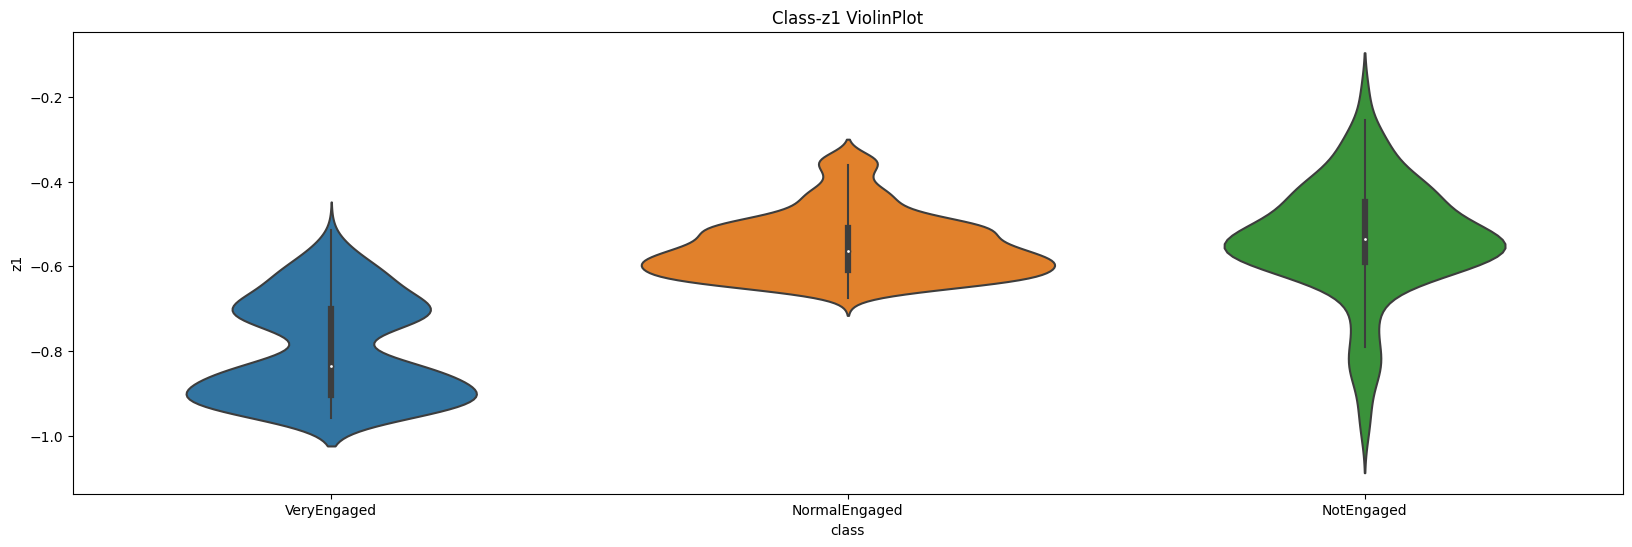

In [12]:
plt.figure(figsize=(20,6))
sns.violinplot(x="class", y='z1', data=df).set_title('Class-z1 ViolinPlot')
plt.show()

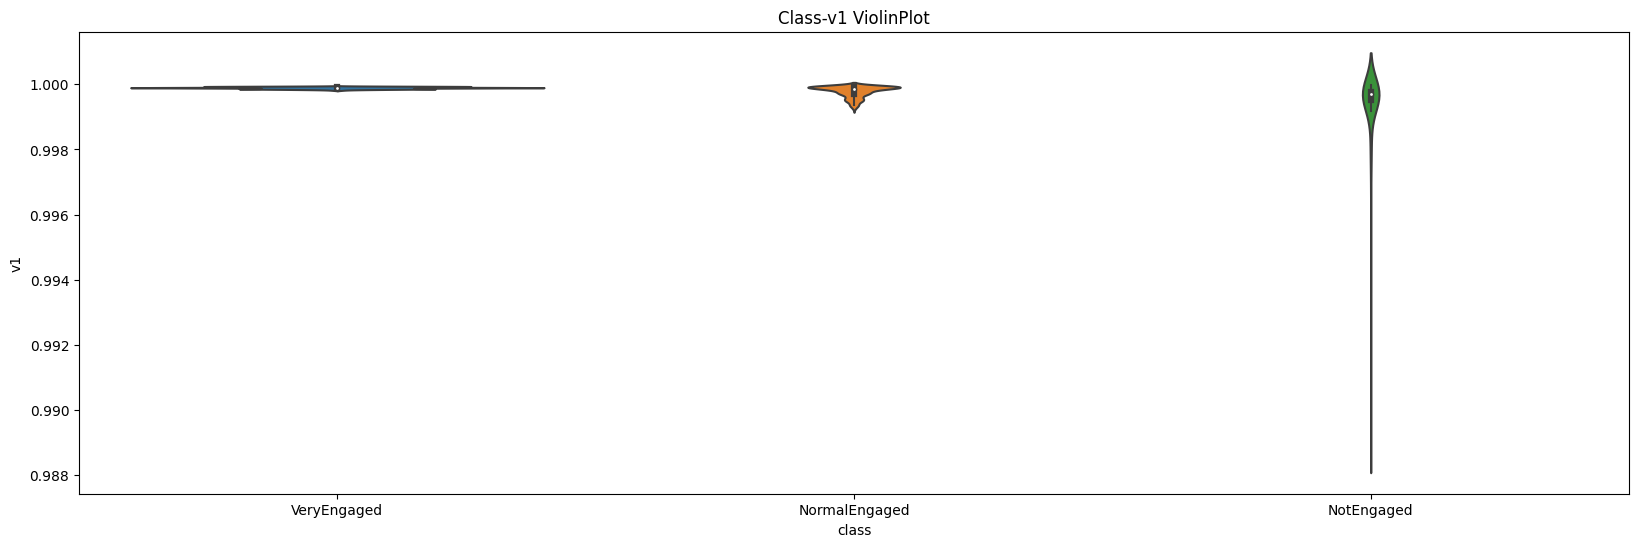

In [13]:
plt.figure(figsize=(20,6))
sns.violinplot(x="class", y='v1', data=df).set_title('Class-v1 ViolinPlot')
plt.show()

### Review Trends

In [78]:
# Convert Class string to int
classmap = {
    'VeryEngaged' : 2,
    'NormalEngaged' : 1,
    'NotEngaged' : 0,
}

Text(0.5, 1.0, 'Trend')

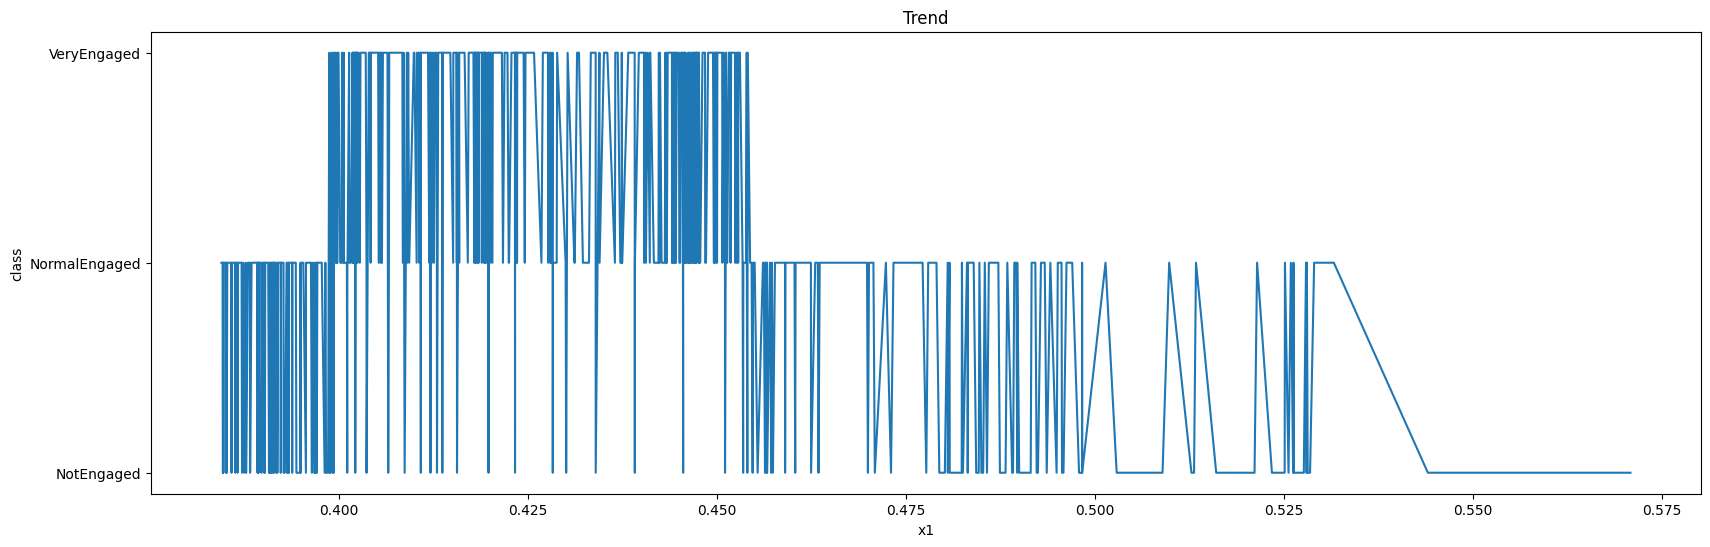

In [23]:
plt.figure(figsize=(20,6))
sns.lineplot(x='x1', y='class', data=df).set_title("Trend")

Text(0.5, 1.0, 'Trend')

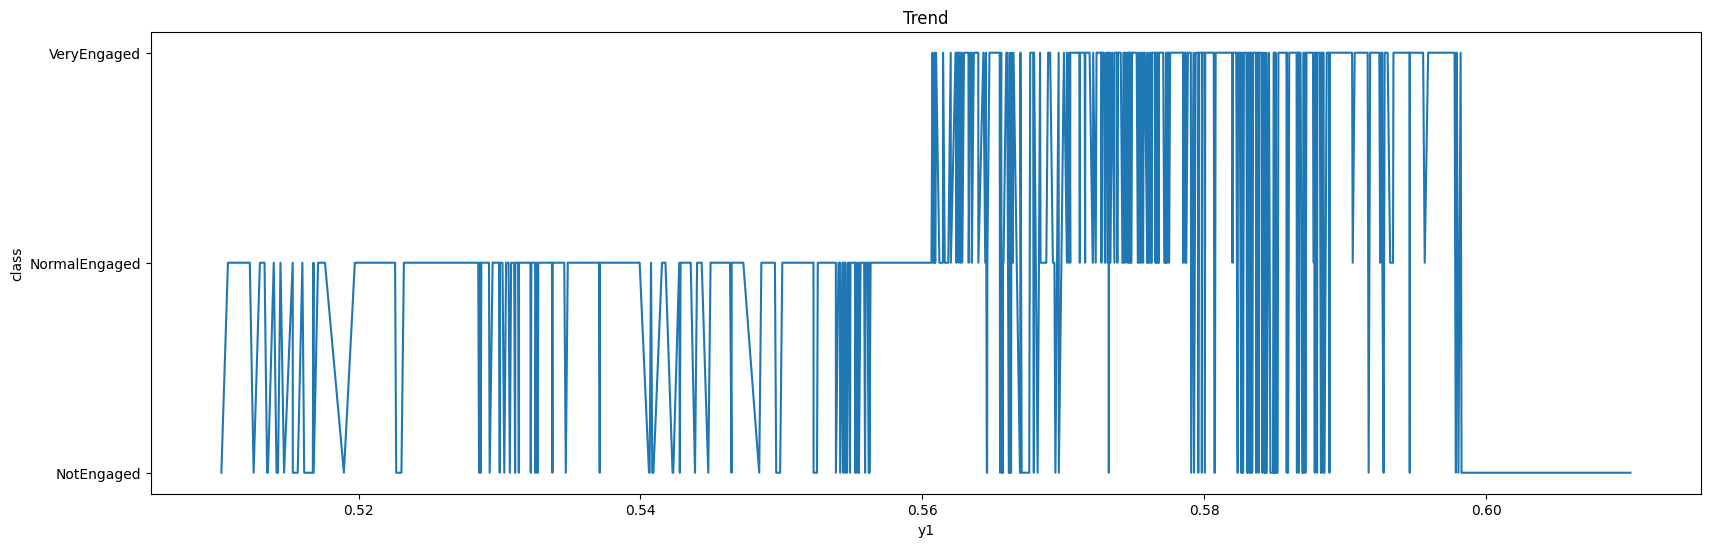

In [24]:
plt.figure(figsize=(20,6))
sns.lineplot(x='y1', y='class', data=df).set_title("Trend")

Text(0.5, 1.0, 'Trend')

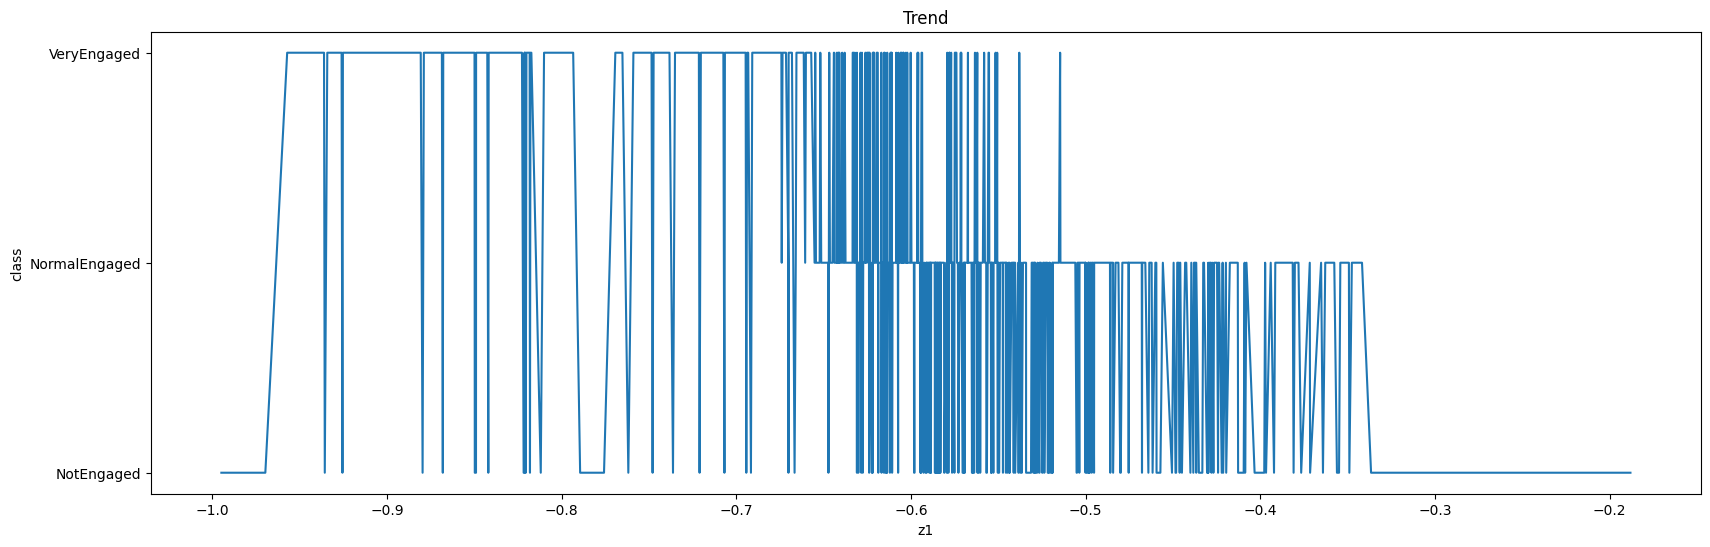

In [25]:
plt.figure(figsize=(20,6))
sns.lineplot(x='z1', y='class', data=df).set_title("Trend")

Text(0.5, 1.0, 'Trend')

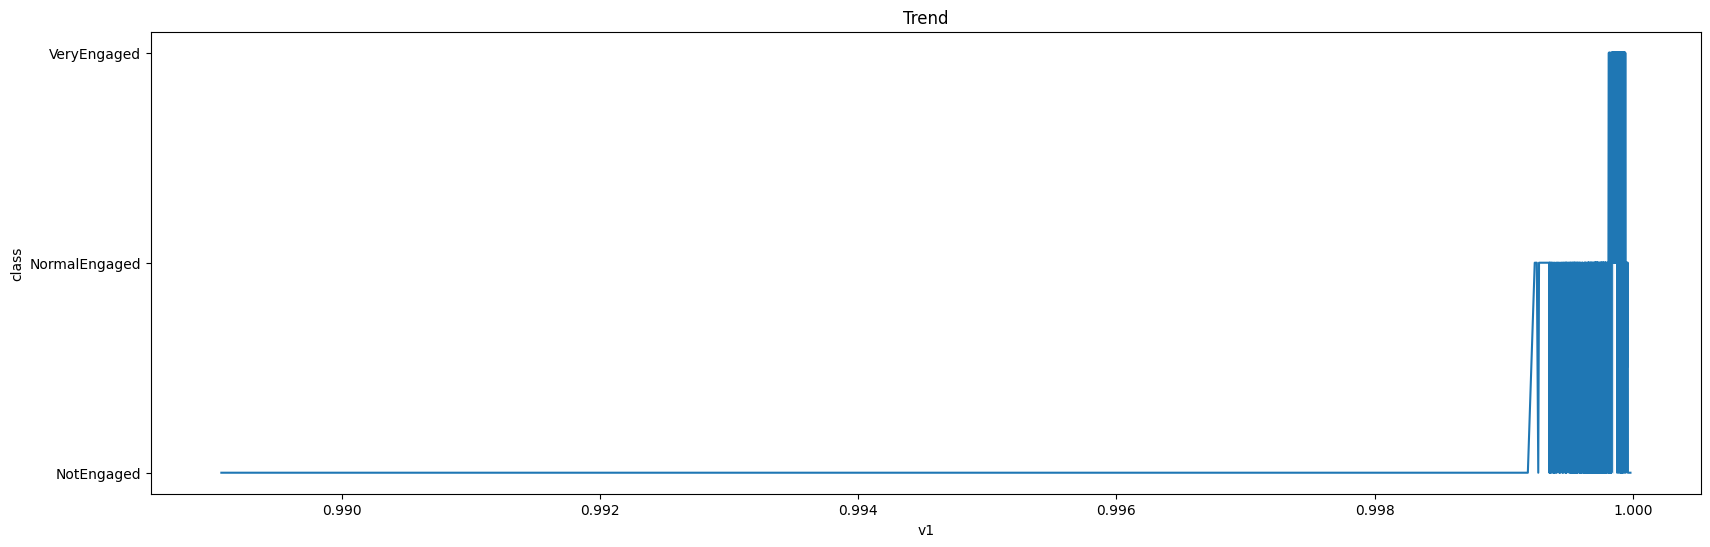

In [26]:
plt.figure(figsize=(20,6))
sns.lineplot(x='v1', y='class', data=df).set_title("Trend")

### Correlation

In [27]:
df.corr()

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
x1,1.000000,0.146409,0.291677,-0.338997,0.981483,0.259977,0.312699,-0.360804,0.959865,0.271005,...,0.327755,NaN,0.936208,0.473306,0.502664,NaN,0.928563,0.493259,0.508021,NaN
y1,0.146409,1.000000,-0.598016,0.069359,0.225546,0.959330,-0.605079,0.081124,0.278350,0.952450,...,-0.725180,NaN,0.221547,0.754015,-0.369137,NaN,0.231481,0.728666,-0.363483,NaN
z1,0.291677,-0.598016,1.000000,-0.235066,0.198522,-0.461447,0.996116,-0.225209,0.130653,-0.474761,...,0.715215,NaN,0.127530,-0.297937,0.238499,NaN,0.112865,-0.275601,0.235098,NaN
v1,-0.338997,0.069359,-0.235066,1.000000,-0.274851,-0.012710,-0.223229,0.986399,-0.233794,0.001004,...,-0.297952,NaN,-0.254770,-0.031699,-0.211663,NaN,-0.245017,-0.036056,-0.212692,NaN
x2,0.981483,0.225546,0.198522,-0.274851,1.000000,0.323936,0.221540,-0.290727,0.994879,0.345503,...,0.202466,NaN,0.979485,0.554427,0.427197,NaN,0.976146,0.573819,0.432666,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x501,0.928563,0.231481,0.112865,-0.245017,0.976146,0.304137,0.139474,-0.255969,0.985620,0.334166,...,0.130460,NaN,0.999664,0.548080,0.403381,NaN,1.000000,0.567004,0.408473,NaN
y501,0.493259,0.728666,-0.275601,-0.036056,0.573819,0.829261,-0.286968,-0.009069,0.598228,0.858535,...,-0.504654,NaN,0.558364,0.998521,-0.285365,NaN,0.567004,1.000000,-0.277354,NaN
z501,0.508021,-0.363483,0.235098,-0.212692,0.432666,-0.393381,0.295734,-0.265370,0.406556,-0.390810,...,0.664475,NaN,0.418328,-0.298446,0.999866,NaN,0.408473,-0.277354,1.000000,NaN


In [28]:
pd.get_dummies(df['class'])

,NormalEngaged,NotEngaged,VeryEngaged
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1342,0,1,0
1343,0,1,0
1344,0,1,0
1345,0,1,0


In [30]:
df.join(pd.get_dummies(df['class']))

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,y500,z500,v500,x501,y501,z501,v501,NormalEngaged,NotEngaged,VeryEngaged
0,VeryEngaged,0.428021,0.566331,-0.846965,0.999854,0.453438,0.511587,-0.806450,0.999585,0.467169,...,0.512698,0.005128,0.0,0.477068,0.508792,0.005216,0.0,0,0,1
1,VeryEngaged,0.417632,0.568355,-0.841822,0.999859,0.445398,0.517177,-0.803710,0.999598,0.460983,...,0.516445,0.005259,0.0,0.473790,0.512148,0.005346,0.0,0,0,1
2,VeryEngaged,0.413305,0.570787,-0.843086,0.999862,0.442470,0.521228,-0.805503,0.999604,0.458644,...,0.518524,0.004070,0.0,0.471252,0.514148,0.004137,0.0,0,0,1
3,VeryEngaged,0.409942,0.572866,-0.845846,0.999862,0.439856,0.524547,-0.808569,0.999602,0.456351,...,0.519998,0.003755,0.0,0.470114,0.515615,0.003821,0.0,0,0,1
4,VeryEngaged,0.410820,0.574290,-0.832475,0.999867,0.440256,0.526780,-0.793832,0.999615,0.456453,...,0.520987,0.003949,0.0,0.470109,0.516579,0.004043,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,NotEngaged,0.559904,0.569444,-0.436734,0.994330,0.555365,0.537132,-0.410733,0.990210,0.555800,...,0.533356,0.022224,0.0,0.580565,0.529553,0.023619,0.0,0,1,0
1343,NotEngaged,0.561264,0.567146,-0.403318,0.992232,0.555583,0.533608,-0.377960,0.987005,0.555716,...,0.536396,0.023411,0.0,0.570974,0.533540,0.024795,0.0,0,1,0
1344,NotEngaged,0.562435,0.566932,-0.392197,0.991148,0.556118,0.533441,-0.367046,0.985351,0.556005,...,0.535898,0.021947,0.0,0.580760,0.532365,0.023330,0.0,0,1,0
1345,NotEngaged,0.565556,0.566949,-0.349061,0.989864,0.558424,0.533859,-0.325464,0.983333,0.557650,...,0.536214,0.019985,0.0,0.586369,0.533173,0.021150,0.0,0,1,0


In [36]:
df['classint'] = df['class'].apply(lambda x:classmap[x])
df

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,v499,x500,y500,z500,v500,x501,y501,z501,v501,classint
0,VeryEngaged,0.428021,0.566331,-0.846965,0.999854,0.453438,0.511587,-0.806450,0.999585,0.467169,...,0.0,0.473038,0.512698,0.005128,0.0,0.477068,0.508792,0.005216,0.0,2
1,VeryEngaged,0.417632,0.568355,-0.841822,0.999859,0.445398,0.517177,-0.803710,0.999598,0.460983,...,0.0,0.469454,0.516445,0.005259,0.0,0.473790,0.512148,0.005346,0.0,2
2,VeryEngaged,0.413305,0.570787,-0.843086,0.999862,0.442470,0.521228,-0.805503,0.999604,0.458644,...,0.0,0.466941,0.518524,0.004070,0.0,0.471252,0.514148,0.004137,0.0,2
3,VeryEngaged,0.409942,0.572866,-0.845846,0.999862,0.439856,0.524547,-0.808569,0.999602,0.456351,...,0.0,0.465836,0.519998,0.003755,0.0,0.470114,0.515615,0.003821,0.0,2
4,VeryEngaged,0.410820,0.574290,-0.832475,0.999867,0.440256,0.526780,-0.793832,0.999615,0.456453,...,0.0,0.465961,0.520987,0.003949,0.0,0.470109,0.516579,0.004043,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,NotEngaged,0.559904,0.569444,-0.436734,0.994330,0.555365,0.537132,-0.410733,0.990210,0.555800,...,0.0,0.578872,0.533356,0.022224,0.0,0.580565,0.529553,0.023619,0.0,0
1343,NotEngaged,0.561264,0.567146,-0.403318,0.992232,0.555583,0.533608,-0.377960,0.987005,0.555716,...,0.0,0.569942,0.536396,0.023411,0.0,0.570974,0.533540,0.024795,0.0,0
1344,NotEngaged,0.562435,0.566932,-0.392197,0.991148,0.556118,0.533441,-0.367046,0.985351,0.556005,...,0.0,0.579060,0.535898,0.021947,0.0,0.580760,0.532365,0.023330,0.0,0
1345,NotEngaged,0.565556,0.566949,-0.349061,0.989864,0.558424,0.533859,-0.325464,0.983333,0.557650,...,0.0,0.584497,0.536214,0.019985,0.0,0.586369,0.533173,0.021150,0.0,0


In [43]:
#Create dictionary to store the new dataframe
corrdict = {}
for key, row in df.join(pd.get_dummies(df['classint'])).iterrows():
    corrdict[key] = {int(row['classint']):row['x1']}
corrdict

{0: {2: 0.4280211329460144},
 1: {2: 0.4176315367221832},
 2: {2: 0.4133047461509704},
 3: {2: 0.4099419116973877},
 4: {2: 0.4108200669288635},
 5: {2: 0.4108737409114837},
 6: {2: 0.4109725058078766},
 7: {2: 0.4115645289421081},
 8: {2: 0.4121995568275451},
 9: {2: 0.4180185198783874},
 10: {2: 0.4233127534389496},
 11: {2: 0.424269437789917},
 12: {2: 0.4244121015071869},
 13: {2: 0.424732357263565},
 14: {2: 0.4247097373008728},
 15: {2: 0.4239979684352875},
 16: {2: 0.4238945543766022},
 17: {2: 0.4235470294952392},
 18: {2: 0.423332542181015},
 19: {2: 0.4233103692531585},
 20: {2: 0.4232877194881439},
 21: {2: 0.4230238795280456},
 22: {2: 0.4230406880378723},
 23: {2: 0.423027753829956},
 24: {2: 0.4230285286903381},
 25: {2: 0.4236566424369812},
 26: {2: 0.4239962100982666},
 27: {2: 0.4236770570278168},
 28: {2: 0.4235288500785827},
 29: {2: 0.4236175417900085},
 30: {2: 0.4252256751060486},
 31: {2: 0.4272204339504242},
 32: {2: 0.431785523891449},
 33: {2: 0.43508929014205

In [44]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)
corrdf.corr()

,2,1,0
2,1.000000,-0.717978,-0.354893
1,-0.717978,1.000000,-0.379369
0,-0.354893,-0.379369,1.000000


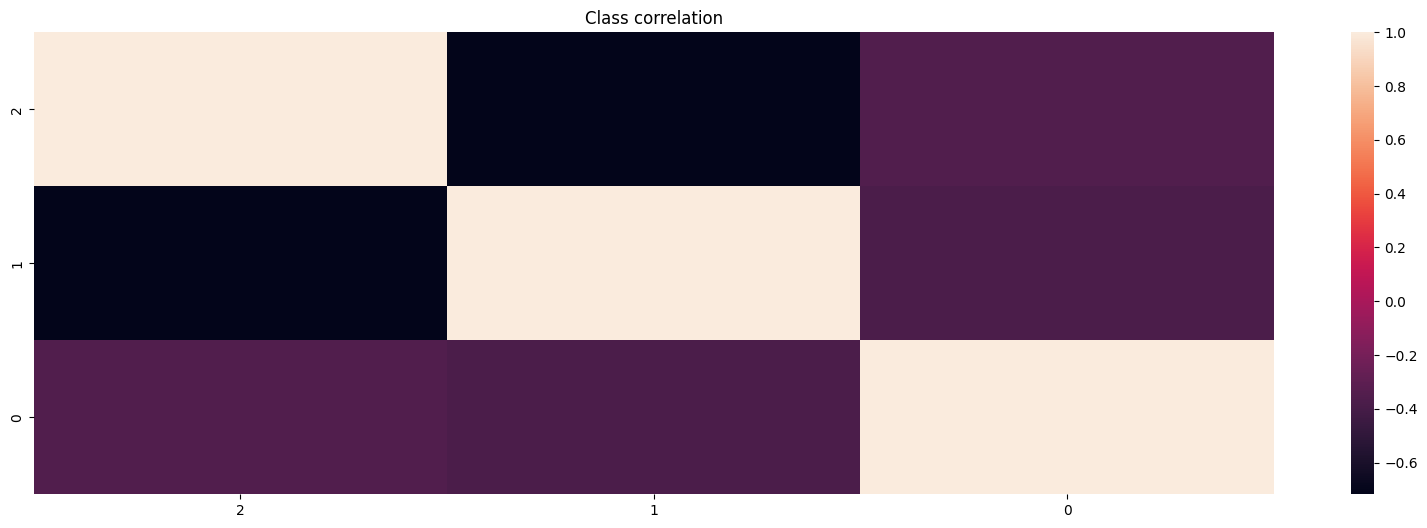

In [45]:
plt.figure(figsize=(20,6))
sns.heatmap(corrdf.corr()).set_title("Class correlation")
plt.show()

# 2. Data Preparation

In [48]:
import numpy as np
import datetime as dt

In [49]:
df['timestamp'] = pd.Series([dt.datetime.now()] * len(df))
df

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,x500,y500,z500,v500,x501,y501,z501,v501,classint,timestamp
0,VeryEngaged,0.428021,0.566331,-0.846965,0.999854,0.453438,0.511587,-0.806450,0.999585,0.467169,...,0.473038,0.512698,0.005128,0.0,0.477068,0.508792,0.005216,0.0,2,2022-09-30 14:43:10.449221
1,VeryEngaged,0.417632,0.568355,-0.841822,0.999859,0.445398,0.517177,-0.803710,0.999598,0.460983,...,0.469454,0.516445,0.005259,0.0,0.473790,0.512148,0.005346,0.0,2,2022-09-30 14:43:10.449221
2,VeryEngaged,0.413305,0.570787,-0.843086,0.999862,0.442470,0.521228,-0.805503,0.999604,0.458644,...,0.466941,0.518524,0.004070,0.0,0.471252,0.514148,0.004137,0.0,2,2022-09-30 14:43:10.449221
3,VeryEngaged,0.409942,0.572866,-0.845846,0.999862,0.439856,0.524547,-0.808569,0.999602,0.456351,...,0.465836,0.519998,0.003755,0.0,0.470114,0.515615,0.003821,0.0,2,2022-09-30 14:43:10.449221
4,VeryEngaged,0.410820,0.574290,-0.832475,0.999867,0.440256,0.526780,-0.793832,0.999615,0.456453,...,0.465961,0.520987,0.003949,0.0,0.470109,0.516579,0.004043,0.0,2,2022-09-30 14:43:10.449221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,NotEngaged,0.559904,0.569444,-0.436734,0.994330,0.555365,0.537132,-0.410733,0.990210,0.555800,...,0.578872,0.533356,0.022224,0.0,0.580565,0.529553,0.023619,0.0,0,2022-09-30 14:43:10.449221
1343,NotEngaged,0.561264,0.567146,-0.403318,0.992232,0.555583,0.533608,-0.377960,0.987005,0.555716,...,0.569942,0.536396,0.023411,0.0,0.570974,0.533540,0.024795,0.0,0,2022-09-30 14:43:10.449221
1344,NotEngaged,0.562435,0.566932,-0.392197,0.991148,0.556118,0.533441,-0.367046,0.985351,0.556005,...,0.579060,0.535898,0.021947,0.0,0.580760,0.532365,0.023330,0.0,0,2022-09-30 14:43:10.449221
1345,NotEngaged,0.565556,0.566949,-0.349061,0.989864,0.558424,0.533859,-0.325464,0.983333,0.557650,...,0.584497,0.536214,0.019985,0.0,0.586369,0.533173,0.021150,0.0,0,2022-09-30 14:43:10.449221


In [66]:
# for classes in df['classint'].unique:
#     plt.figure(figsize=(20,6))
#     sns.lineplot(x='timestamp', y='x1', estimator=np.median, hue='classint', data=df).set_title('{} by class'.format(classes))
#     plt.show()

In [67]:
len(df['class'].unique())

3

In [69]:
# One-Hot encoding Class column
pd.get_dummies(df['classint'])

,0,1,2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1342,1,0,0
1343,1,0,0
1344,1,0,0
1345,1,0,0


In [70]:
pd.get_dummies(df)

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,v500,x501,y501,z501,v501,classint,timestamp,class_NormalEngaged,class_NotEngaged,class_VeryEngaged
0,0.428021,0.566331,-0.846965,0.999854,0.453438,0.511587,-0.806450,0.999585,0.467169,0.512261,...,0.0,0.477068,0.508792,0.005216,0.0,2,2022-09-30 14:43:10.449221,0,0,1
1,0.417632,0.568355,-0.841822,0.999859,0.445398,0.517177,-0.803710,0.999598,0.460983,0.517086,...,0.0,0.473790,0.512148,0.005346,0.0,2,2022-09-30 14:43:10.449221,0,0,1
2,0.413305,0.570787,-0.843086,0.999862,0.442470,0.521228,-0.805503,0.999604,0.458644,0.521125,...,0.0,0.471252,0.514148,0.004137,0.0,2,2022-09-30 14:43:10.449221,0,0,1
3,0.409942,0.572866,-0.845846,0.999862,0.439856,0.524547,-0.808569,0.999602,0.456351,0.524717,...,0.0,0.470114,0.515615,0.003821,0.0,2,2022-09-30 14:43:10.449221,0,0,1
4,0.410820,0.574290,-0.832475,0.999867,0.440256,0.526780,-0.793832,0.999615,0.456453,0.527102,...,0.0,0.470109,0.516579,0.004043,0.0,2,2022-09-30 14:43:10.449221,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0.559904,0.569444,-0.436734,0.994330,0.555365,0.537132,-0.410733,0.990210,0.555800,0.535218,...,0.0,0.580565,0.529553,0.023619,0.0,0,2022-09-30 14:43:10.449221,0,1,0
1343,0.561264,0.567146,-0.403318,0.992232,0.555583,0.533608,-0.377960,0.987005,0.555716,0.531618,...,0.0,0.570974,0.533540,0.024795,0.0,0,2022-09-30 14:43:10.449221,0,1,0
1344,0.562435,0.566932,-0.392197,0.991148,0.556118,0.533441,-0.367046,0.985351,0.556005,0.531466,...,0.0,0.580760,0.532365,0.023330,0.0,0,2022-09-30 14:43:10.449221,0,1,0
1345,0.565556,0.566949,-0.349061,0.989864,0.558424,0.533859,-0.325464,0.983333,0.557650,0.531933,...,0.0,0.586369,0.533173,0.021150,0.0,0,2022-09-30 14:43:10.449221,0,1,0


In [74]:
df.drop(['classint'], axis=1, inplace=True)

In [75]:
pd.get_dummies(df)

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,y500,z500,v500,x501,y501,z501,v501,class_NormalEngaged,class_NotEngaged,class_VeryEngaged
0,0.428021,0.566331,-0.846965,0.999854,0.453438,0.511587,-0.806450,0.999585,0.467169,0.512261,...,0.512698,0.005128,0.0,0.477068,0.508792,0.005216,0.0,0,0,1
1,0.417632,0.568355,-0.841822,0.999859,0.445398,0.517177,-0.803710,0.999598,0.460983,0.517086,...,0.516445,0.005259,0.0,0.473790,0.512148,0.005346,0.0,0,0,1
2,0.413305,0.570787,-0.843086,0.999862,0.442470,0.521228,-0.805503,0.999604,0.458644,0.521125,...,0.518524,0.004070,0.0,0.471252,0.514148,0.004137,0.0,0,0,1
3,0.409942,0.572866,-0.845846,0.999862,0.439856,0.524547,-0.808569,0.999602,0.456351,0.524717,...,0.519998,0.003755,0.0,0.470114,0.515615,0.003821,0.0,0,0,1
4,0.410820,0.574290,-0.832475,0.999867,0.440256,0.526780,-0.793832,0.999615,0.456453,0.527102,...,0.520987,0.003949,0.0,0.470109,0.516579,0.004043,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0.559904,0.569444,-0.436734,0.994330,0.555365,0.537132,-0.410733,0.990210,0.555800,0.535218,...,0.533356,0.022224,0.0,0.580565,0.529553,0.023619,0.0,0,1,0
1343,0.561264,0.567146,-0.403318,0.992232,0.555583,0.533608,-0.377960,0.987005,0.555716,0.531618,...,0.536396,0.023411,0.0,0.570974,0.533540,0.024795,0.0,0,1,0
1344,0.562435,0.566932,-0.392197,0.991148,0.556118,0.533441,-0.367046,0.985351,0.556005,0.531466,...,0.535898,0.021947,0.0,0.580760,0.532365,0.023330,0.0,0,1,0
1345,0.565556,0.566949,-0.349061,0.989864,0.558424,0.533859,-0.325464,0.983333,0.557650,0.531933,...,0.536214,0.019985,0.0,0.586369,0.533173,0.021150,0.0,0,1,0


In [76]:
# One-Hot encoding the entire dataset
df = pd.get_dummies(df)
df

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,y500,z500,v500,x501,y501,z501,v501,class_NormalEngaged,class_NotEngaged,class_VeryEngaged
0,0.428021,0.566331,-0.846965,0.999854,0.453438,0.511587,-0.806450,0.999585,0.467169,0.512261,...,0.512698,0.005128,0.0,0.477068,0.508792,0.005216,0.0,0,0,1
1,0.417632,0.568355,-0.841822,0.999859,0.445398,0.517177,-0.803710,0.999598,0.460983,0.517086,...,0.516445,0.005259,0.0,0.473790,0.512148,0.005346,0.0,0,0,1
2,0.413305,0.570787,-0.843086,0.999862,0.442470,0.521228,-0.805503,0.999604,0.458644,0.521125,...,0.518524,0.004070,0.0,0.471252,0.514148,0.004137,0.0,0,0,1
3,0.409942,0.572866,-0.845846,0.999862,0.439856,0.524547,-0.808569,0.999602,0.456351,0.524717,...,0.519998,0.003755,0.0,0.470114,0.515615,0.003821,0.0,0,0,1
4,0.410820,0.574290,-0.832475,0.999867,0.440256,0.526780,-0.793832,0.999615,0.456453,0.527102,...,0.520987,0.003949,0.0,0.470109,0.516579,0.004043,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0.559904,0.569444,-0.436734,0.994330,0.555365,0.537132,-0.410733,0.990210,0.555800,0.535218,...,0.533356,0.022224,0.0,0.580565,0.529553,0.023619,0.0,0,1,0
1343,0.561264,0.567146,-0.403318,0.992232,0.555583,0.533608,-0.377960,0.987005,0.555716,0.531618,...,0.536396,0.023411,0.0,0.570974,0.533540,0.024795,0.0,0,1,0
1344,0.562435,0.566932,-0.392197,0.991148,0.556118,0.533441,-0.367046,0.985351,0.556005,0.531466,...,0.535898,0.021947,0.0,0.580760,0.532365,0.023330,0.0,0,1,0
1345,0.565556,0.566949,-0.349061,0.989864,0.558424,0.533859,-0.325464,0.983333,0.557650,0.531933,...,0.536214,0.019985,0.0,0.586369,0.533173,0.021150,0.0,0,1,0


In [77]:
df.dtypes

x1                     float64
y1                     float64
z1                     float64
v1                     float64
x2                     float64
                        ...   
z501                   float64
v501                   float64
class_NormalEngaged      uint8
class_NotEngaged         uint8
class_VeryEngaged        uint8
Length: 2007, dtype: object

### 3. Modelling

In [80]:
df = pd.read_csv('engagement.csv')
df['classint'] = df['class'].apply(lambda x:classmap[x])
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,v499,x500,y500,z500,v500,x501,y501,z501,v501,classint
0,VeryEngaged,0.428021,0.566331,-0.846965,0.999854,0.453438,0.511587,-0.806450,0.999585,0.467169,...,0.0,0.473038,0.512698,0.005128,0.0,0.477068,0.508792,0.005216,0.0,2
1,VeryEngaged,0.417632,0.568355,-0.841822,0.999859,0.445398,0.517177,-0.803710,0.999598,0.460983,...,0.0,0.469454,0.516445,0.005259,0.0,0.473790,0.512148,0.005346,0.0,2
2,VeryEngaged,0.413305,0.570787,-0.843086,0.999862,0.442470,0.521228,-0.805503,0.999604,0.458644,...,0.0,0.466941,0.518524,0.004070,0.0,0.471252,0.514148,0.004137,0.0,2
3,VeryEngaged,0.409942,0.572866,-0.845846,0.999862,0.439856,0.524547,-0.808569,0.999602,0.456351,...,0.0,0.465836,0.519998,0.003755,0.0,0.470114,0.515615,0.003821,0.0,2
4,VeryEngaged,0.410820,0.574290,-0.832475,0.999867,0.440256,0.526780,-0.793832,0.999615,0.456453,...,0.0,0.465961,0.520987,0.003949,0.0,0.470109,0.516579,0.004043,0.0,2


In [81]:
X = df.drop(['class','classint'], axis=1)
y = df['classint']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [84]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(942, 2004) (405, 2004) (942,) (405,)


In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [90]:
# 02. Train ML classification (create 4 models)
pipeline = {
    'lr': make_pipeline(StandardScaler(), LogisticRegression()),
    'rc': make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier())
}

In [87]:
print(LogisticRegression().get_params())
print(RidgeClassifier().get_params())
print(RandomForestClassifier().get_params())
print(GradientBoostingClassifier().get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
{'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 

In [91]:
fit_models = {}
for algo, pipeline in pipeline.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

print(fit_models)

c:\Users\hasegawa-lab-pc\miniconda3\envs\cuda112\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())]), 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgeclassifier', RidgeClassifier())]), 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())]), 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])}


In [99]:
# Evaluate and Serialize Model
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test,yhat))
    # print('{} scores - Accuracy:{} MAE:{}'.format(algo, accuracy_score(y_test, yhat)))

# print(fit_models['rf'].predict(x_test))

lr 1.0
rc 1.0
rf 1.0
gb 1.0


### Regression

In [107]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV #automatically hyperparameter tuning
from sklearn.exceptions import NotFittedError

from sklearn.metrics import r2_score, mean_absolute_error 

In [102]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

In [103]:
print(RandomForestRegressor().get_params())
print(GradientBoostingRegressor().get_params())
print(Ridge().get_params())
print(Lasso().get_params())
print(ElasticNet().get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol'

In [104]:
# Fine-tune the hyperparameter
# Specify hyperparameter grid
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [106]:
fit_models = {} #store the models
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.


c:\Users\hasegawa-lab-pc\miniconda3\envs\cuda112\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.947e-02, tolerance: 4.734e-02
  model = cd_fast.enet_coordinate_descent(


lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [108]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.9986479840069368 MAE:0.002864197530864198
gb scores - R2:0.9979982815527723 MAE:0.0023349585923000825
ridge scores - R2:0.9961066824235504 MAE:0.03242411282043248
lasso scores - R2:0.9549377205075007 MAE:0.11017621722970167
enet scores - R2:0.9662208411252775 MAE:0.09728888097745013


# 3. Deployment